In [1]:
import cProfile
import re
import scipy

import numpy as np
import random

import matplotlib

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numba

In [2]:
cd C:\Users\ArianStolk\Documents\GitHub\SPDC

C:\Users\ArianStolk\Documents\GitHub\SPDC


In [3]:
%run physics.py
%run main.py

In [4]:
imported=np.load("C:/Users/ArianStolk/Documents/20012017_vertical_ellipse_final.npz")

imported['arr_0']

array([[  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15],
       [ 97, 129, 136, 163, 147, 164, 140, 133, 155, 142, 140, 143, 129],
       [142, 179, 183, 214, 206, 209, 207, 219, 198, 204, 203, 217, 173],
       [279, 357, 430, 425, 443, 429, 430, 429, 412, 399, 375, 382, 377],
       [381, 500, 614, 662, 644, 670, 660, 650, 642, 568, 570, 518, 519],
       [511, 684, 792, 859, 836, 875, 880, 820, 813, 775, 742, 721, 656]])

In [5]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

C:\Users\ArianStolk\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


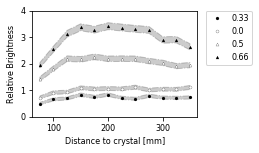

In [23]:
start_x=0
pump_M2_list=imported['arr_3']
pumps = np.round(imported['arr_1'],3)
pump_focus_list=imported['arr_2']

normfactor=np.mean(imported['arr_0'][2])

xpos=imported['arr_0'][0]
plotpos=xpos[start_x:-1]

thisfig=plt.figure(figsize=[3.14*0.9422516984794563,2.36*0.8285461776403004])
for j,y in enumerate(imported['arr_0'][1:5]):
    c = ['k','k','k','k','k','k','k','k','k'][j]
    c2 = ['ko','ko','k^','k^','k','y*','b*','g*','r*'][j]
    mkfc = ['Black','White','White','Black'][j]
    label = [0.33, 0.0, 0.5, 0.66, 0.75][j]
    plt.plot(plotpos*25,[y[i+start_x]/(normfactor) for i,x in enumerate(plotpos)],c2,label=label,markersize=3,markerfacecolor=mkfc,markeredgewidth=0.2)
    plt.fill_between(plotpos*25, [(y[i+start_x]-np.sqrt(y[i+start_x]))/(normfactor) for i,x in enumerate(plotpos)], [(y[i+start_x]+np.sqrt(y[i+start_x]))/(normfactor) for i,x in enumerate(plotpos)],alpha=0.2,linestyle='dashdot', edgecolor=c, facecolor=c)
plt.ylim(0,4)
plt.xlabel("Distance to crystal [mm]")
plt.ylabel("Relative Brightness")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

thisfig.savefig("C:/Users/ArianStolk/Documents/20012017_vertical_ellipse_final_V5.svg", dpi=1000, format="svg",pad_inches=0.0)

In [262]:
[x for x in pumps]

[array([ 0.15,  0.1 ]),
 array([ 0.1,  0.1]),
 array([ 0.05,  0.1 ]),
 array([ 0.033,  0.1  ]),
 array([ 0.025,  0.1  ])]

In [7]:
imported2=np.load("C:/Users/ArianStolk/Documents/22012017_horizontal_ellipse_final.npz")

imported2['arr_0']



array([[  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15],
       [107, 152, 165, 202, 181, 187, 185, 170, 177, 168, 143, 158, 161],
       [143, 171, 232, 214, 223, 222, 235, 217, 226, 191, 199, 189, 162],
       [ 43, 263, 294, 285, 264, 270, 254, 257, 231, 218, 208, 210, 189],
       [246, 277, 285, 334, 277, 283, 254, 218, 244, 206, 181, 196, 183],
       [292, 339, 340, 337, 309, 266, 276, 248, 199, 229, 220, 195, 175]])

In [8]:
imported2['arr_1']

array([[ 0.15   ,  0.1    ],
       [ 0.1    ,  0.1    ],
       [ 0.05   ,  0.1    ],
       [ 0.03333,  0.1    ],
       [ 0.025  ,  0.1    ]])

C:\Users\ArianStolk\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


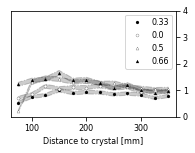

In [22]:
kk=0
start_x=0
pump_M2_list=imported2['arr_3']
pumps = np.round(imported2['arr_1'],3)
pump_focus_list=imported2['arr_2']

normfactor=np.mean(imported2['arr_0'][2])

xpos=imported2['arr_0'][0]
plotpos=xpos[start_x:-1]

# fig=plt.figure(figsize=[20,15])
fig=plt.figure(figsize=[3.14*0.9422516984794563,2.36*0.8285461776403004])

ax1 = fig.add_subplot(111)
for j,y in enumerate(imported2['arr_0'][1:5]):
    c = ['k','k','k','k','k','k','k','k','k'][j]
    c2 = ['ko','ko','k^','k^','k','y*','b*','g*','r*'][j]
    mkfc = ['Black','White','White','Black'][j]
    label = [0.33, 0.0, 0.5, 0.66, 0.75][j]
    plt.plot(plotpos*25,[y[i+start_x]/(normfactor) for i,x in enumerate(plotpos)],c2,label=label,markersize=3,markerfacecolor=mkfc,markeredgewidth=0.2)
    plt.fill_between(plotpos*25, [(y[i+start_x]-np.sqrt(y[i+start_x]))/(normfactor) for i,x in enumerate(plotpos)], [(y[i+start_x]+np.sqrt(y[i+start_x]))/(normfactor) for i,x in enumerate(plotpos)],alpha=0.2,linestyle='dashdot', edgecolor=c, facecolor=c)
plt.legend()
plt.ylim(0,4)
ax1.yaxis.tick_right()
plt.xlabel("Distance to crystal [mm]")
plt.show()

fig.savefig("C:/Users/ArianStolk/Documents/22012017_horizontal_ellipse_final_V5.svg", dpi=1000, format="svg",pad_inches=0)

In [200]:
A_pump_M2_list=np.array([[1.0577,1.1076],[1.22,1.08],[1.,1],[1.1,1.0]])*1
A_pumps = np.array([[0.098334,0.096517],[0.0521,0.096],[0.0325,0.0956],[0.1485,0.099]])
A_pump_focus_list=np.array([[2.5+11.9,2.5],[2.5,2.5+23],[2.5,2.5-10.5],[2.5,2.5-34.5]])


In [201]:
[[np.round(1e-3*(np.pi*((x[0]))**2)/((405*1e-9)*A_pump_M2_list[i][0]),2),np.round(1e-3*(np.pi*(x[1])**2)/((405*1e-9)*A_pump_M2_list[i][1]),2)] for i,x in enumerate(A_pumps)]

[[70.920000000000002, 65.239999999999995],
 [17.260000000000002, 66.189999999999998],
 [8.1899999999999995, 70.890000000000001],
 [155.50999999999999, 76.030000000000001]]

331827


In [196]:
A_pump_M2_list=np.array([[1.0577,1.1076],[1.4723,1.0191],[1.6733,1],[1.1,1.0]])*1
A_pumps = [[0.098334,0.096517],[0.096551,0.052454],[0.081456,0.025478],[0.099,0.137]]
A_pump_focus_list=[[2.5+11.9,2.5],[2.5-8,2.5],[2.5-22.8,2.5],[2.5-48,2.5]]

In [197]:
[[np.round(1e-3*(np.pi*((x[0]))**2)/((405*1e-9)*A_pump_M2_list[i][0]),2),np.round(1e-3*(np.pi*(x[1])**2)/((405*1e-9)*A_pump_M2_list[i][1]),2)] for i,x in enumerate(A_pumps)]

[[70.920000000000002, 65.239999999999995],
 [49.109999999999999, 20.940000000000001],
 [30.760000000000002, 5.04],
 [69.120000000000005, 145.59]]

In [11]:
Crystal1=Crystal(name = 'BBO1',material = 'BBO',position = [0,0,2.5],thickness = 5,orientation="up",cutangle=28.76*np.pi/180)
lenspos=25*4
ACH=Lens.asphere_r(position = [0,0,lenspos],centre=[-0.18,0,0],f=250)
Csetup=ExpSetup(Crystal1,ACH)
sim2=Simulation(rays=[0],setup=Csetup)
sim2.run(Ntot=300000000,nr_crystals=1,gen_SPDC = True,pumpray=Ray(position=[0,0,0],angles=[0,0],wavelength=405,polarization="H"),pump_waist=[0.096,0.096],pump_focus=[2.5,2.5],pump_M2=[1,1],walkoff=True,pumpcurv=True)
print(len(sim2.complete_results[0][0]))
start_photons1=sim2.start_list

1102938


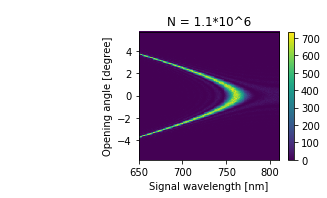

In [19]:
thisfigure1=plt.figure(figsize=[3.14,2.36])
plt.hist2d(start_photons1[0][2].T[0],180/np.pi*np.sign((start_photons1[0][1]-start_photons1[1][1]).T[0])*np.linalg.norm(start_photons1[0][1]-start_photons1[1][1],axis=1),300)
plt.colorbar()
axes = plt.gca()
axes.set_xlim([650,810])
axes.set_ylim(180/np.pi*np.array([-0.1,0.1]))
plt.xlabel("Signal wavelength [nm]")
plt.ylabel("Opening angle [degree]")
plt.title("N = 1.1*10^6")
plt.show()

thisfigure1.savefig("C:/Users/ArianStolk/Documents/phasematch_96.svg", dpi=1000, format="svg",pad_inches=0.0)

In [13]:
Crystal1=Crystal(name = 'BBO1',material = 'BBO',position = [0,0,2.5],thickness = 5,orientation="up",cutangle=28.76*np.pi/180)
lenspos=25*4
ACH=Lens.asphere_r(position = [0,0,lenspos],centre=[-0.18,0,0],f=250)
Csetup=ExpSetup(Crystal1,ACH)
sim2=Simulation(rays=[0],setup=Csetup)
sim2.run(Ntot=300000000,nr_crystals=1,gen_SPDC = True,pumpray=Ray(position=[0,0,0],angles=[0,0],wavelength=405,polarization="H"),pump_waist=[0.025,0.025],pump_focus=[2.5,2.5],pump_M2=[1,1],walkoff=True,pumpcurv=True)
print(len(sim2.complete_results[0][0]))
start_photons3=sim2.start_list

C:\Users\ArianStolk\Documents\GitHub\SPDC\main.py:587: RuntimeWarning: invalid value encountered in arcsin
  angles =  np.arcsin(np.sin(angle)*indexfract)+np.arctan(position_on_lens*(alpha/np.cos(alpha)))


1128753


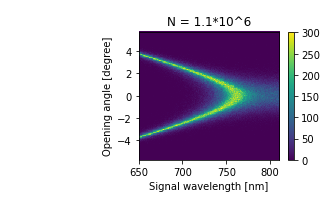

In [18]:
thisfigure2=plt.figure(figsize=[3.14,2.36])
plt.hist2d((start_photons3[0][2].T[0]),180/np.pi*np.sign((start_photons3[0][1]-start_photons3[1][1]).T[0])*np.linalg.norm(start_photons3[0][1]-start_photons3[1][1],axis=1),300)
plt.colorbar()
axes = plt.gca()
axes.set_xlim([650,810])
axes.set_ylim(180/np.pi*np.array([-0.1,0.1]))
plt.xlabel("Signal wavelength [nm]")
plt.ylabel("Opening angle [degree]")
plt.title("N = 1.1*10^6")
plt.show()
thisfigure2.savefig("C:/Users/ArianStolk/Documents/phasematch_25.svg", dpi=1000, format="svg",pad_inches=0.0)

In [15]:
Crystal1=Crystal(name = 'BBO1',material = 'BBO',position = [0,0,2.5],thickness = 5,orientation="up",cutangle=28.76*np.pi/180)
lenspos=25*4
ACH=Lens.asphere_r(position = [0,0,lenspos],centre=[-0.18,0,0],f=250)
Csetup=ExpSetup(Crystal1,ACH)
sim2=Simulation(rays=[0],setup=Csetup)
sim2.run(Ntot=300000000,nr_crystals=1,gen_SPDC = True,pumpray=Ray(position=[0,0,0],angles=[0,0],wavelength=405,polarization="H"),pump_waist=[0.0106,0.0106],pump_focus=[2.5,2.5],pump_M2=[1,1],walkoff=True,pumpcurv=True)
print(len(sim2.complete_results[0][0]))
start_photons2=sim2.start_list

C:\Users\ArianStolk\Documents\GitHub\SPDC\main.py:587: RuntimeWarning: invalid value encountered in arcsin
  angles =  np.arcsin(np.sin(angle)*indexfract)+np.arctan(position_on_lens*(alpha/np.cos(alpha)))


827623


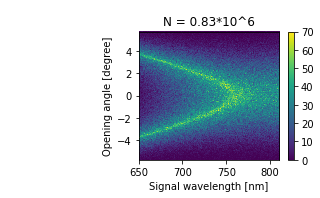

In [17]:
thisfigure3=plt.figure(figsize=[3.14,2.36])
plt.hist2d((start_photons2[0][2].T[0]),180/np.pi*np.sign((start_photons2[0][1]-start_photons2[1][1]).T[0])*np.linalg.norm(start_photons2[0][1]-start_photons2[1][1],axis=1),300)
plt.colorbar()
axes = plt.gca()
axes.set_xlim([650,810])
axes.set_ylim(180/np.pi*np.array([-0.1,0.1]))
plt.xlabel("Signal wavelength [nm]")
plt.ylabel("Opening angle [degree]")
plt.title("N = 0.83*10^6")
plt.show()
thisfigure3.savefig("C:/Users/ArianStolk/Documents/phasematch_10.svg", dpi=1000, format="svg",pad_inches=0.0)